In [2]:
from generator import LowShotGenerator
from data_utils import *

import pandas as pd

data_obj = get_processed_data(num_files_to_fetch_data_from=12)
X, y = get_features_and_labels(data_obj)

fetching data from file #1
fetching data from file #2
fetching data from file #3
fetching data from file #4
fetching data from file #5
fetching data from file #6
fetching data from file #7
fetching data from file #8
fetching data from file #9
fetching data from file #10
fetching data from file #11
fetching data from file #12


In [3]:
diseases_to_remove = ['Pneumothorax']
X, y = remove_diseases(X, y, diseases_to_remove, data_obj)
X_train, X_test, y_train, y_test = get_train_test_split(X, y, test_size=0.1, n_classes=15)

In [11]:
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy
import keras.backend as K

# loss = lambda y_true, y_pred: K.sum(binary_crossentropy(y_true, y_pred))
loss = 'categorical_crossentropy'
optimizer = Adam(lr=1e-4)
n_epochs = 10

from classifier import Classifier
cls = Classifier(n_classes=15, optimizer=optimizer, loss=loss, n_epochs=n_epochs)
cls.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
lclassifier (Dense)          (None, 15)                30735     
Total params: 30,735
Trainable params: 30,735
Non-trainable params: 0
_________________________________________________________________


In [12]:
cls.fit(X_train, y_train)


Train on 72195 samples, validate on 8022 samples
Epoch 1/100
 - 5s - loss: 2.5411 - acc: 0.1297 - val_loss: 2.5825 - val_acc: 0.1901
Epoch 2/100
 - 5s - loss: 2.3602 - acc: 0.1673 - val_loss: 2.5236 - val_acc: 0.1303
Epoch 3/100
 - 5s - loss: 2.2898 - acc: 0.1702 - val_loss: 2.4656 - val_acc: 0.1913
Epoch 4/100
 - 5s - loss: 2.2373 - acc: 0.1785 - val_loss: 2.4569 - val_acc: 0.1952
Epoch 5/100
 - 5s - loss: 2.1996 - acc: 0.1782 - val_loss: 2.4180 - val_acc: 0.1739
Epoch 6/100
 - 5s - loss: 2.1678 - acc: 0.1851 - val_loss: 2.4012 - val_acc: 0.1546
Epoch 7/100
 - 5s - loss: 2.1420 - acc: 0.1832 - val_loss: 2.3916 - val_acc: 0.1987
Epoch 8/100
 - 5s - loss: 2.1149 - acc: 0.1905 - val_loss: 2.3942 - val_acc: 0.1834
Epoch 9/100
 - 5s - loss: 2.0905 - acc: 0.1899 - val_loss: 2.3793 - val_acc: 0.1523
Epoch 10/100
 - 5s - loss: 2.0712 - acc: 0.1943 - val_loss: 2.3758 - val_acc: 0.2165
Epoch 11/100
 - 5s - loss: 2.0533 - acc: 0.1973 - val_loss: 2.3570 - val_acc: 0.1688
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 1.5033 - acc: 0.2548 - val_loss: 2.6220 - val_acc: 0.1936
Epoch 98/100
 - 5s - loss: 1.4990 - acc: 0.2515 - val_loss: 2.6062 - val_acc: 0.1708
Epoch 99/100
 - 5s - loss: 1.4975 - acc: 0.2552 - val_loss: 2.6077 - val_acc: 0.1798
Epoch 100/100
 - 5s - loss: 1.4951 - acc: 0.2520 - val_loss: 2.6187 - val_acc: 0.1576
8913/8913 [==============================] - 0s 45us/step
accuracy acheived: 0.160440


In [20]:
y_score = cls.model.predict(X_test)

loss, acc = cls.evaluate(X_test, y_test)
print("accuracy acheived for all together: %f\n" % acc)

mask = ~(y_test[:,10] == 1.0)
y_test_sub = y_test[mask]
X_test_sub = X_test[mask]
loss, acc = cls.evaluate(X_test_sub, y_test_sub)
print("accuracy acheived for diseases: %f\n" % acc)

mask = (y_test[:,10] == 1.0)
y_test_sub = y_test[mask]
X_test_sub = X_test[mask]
loss, acc = cls.evaluate(X_test_sub, y_test_sub)
print("accuracy acheived for No Finding: %f" % acc)

8913/8913 [==============================] - 0s 38us/step
accuracy acheived for all together: 0.160440

2944/2944 [==============================] - 0s 38us/step
accuracy acheived for diseases: 0.217052

5969/5969 [==============================] - 0s 40us/step
accuracy acheived for No Finding: 0.132518


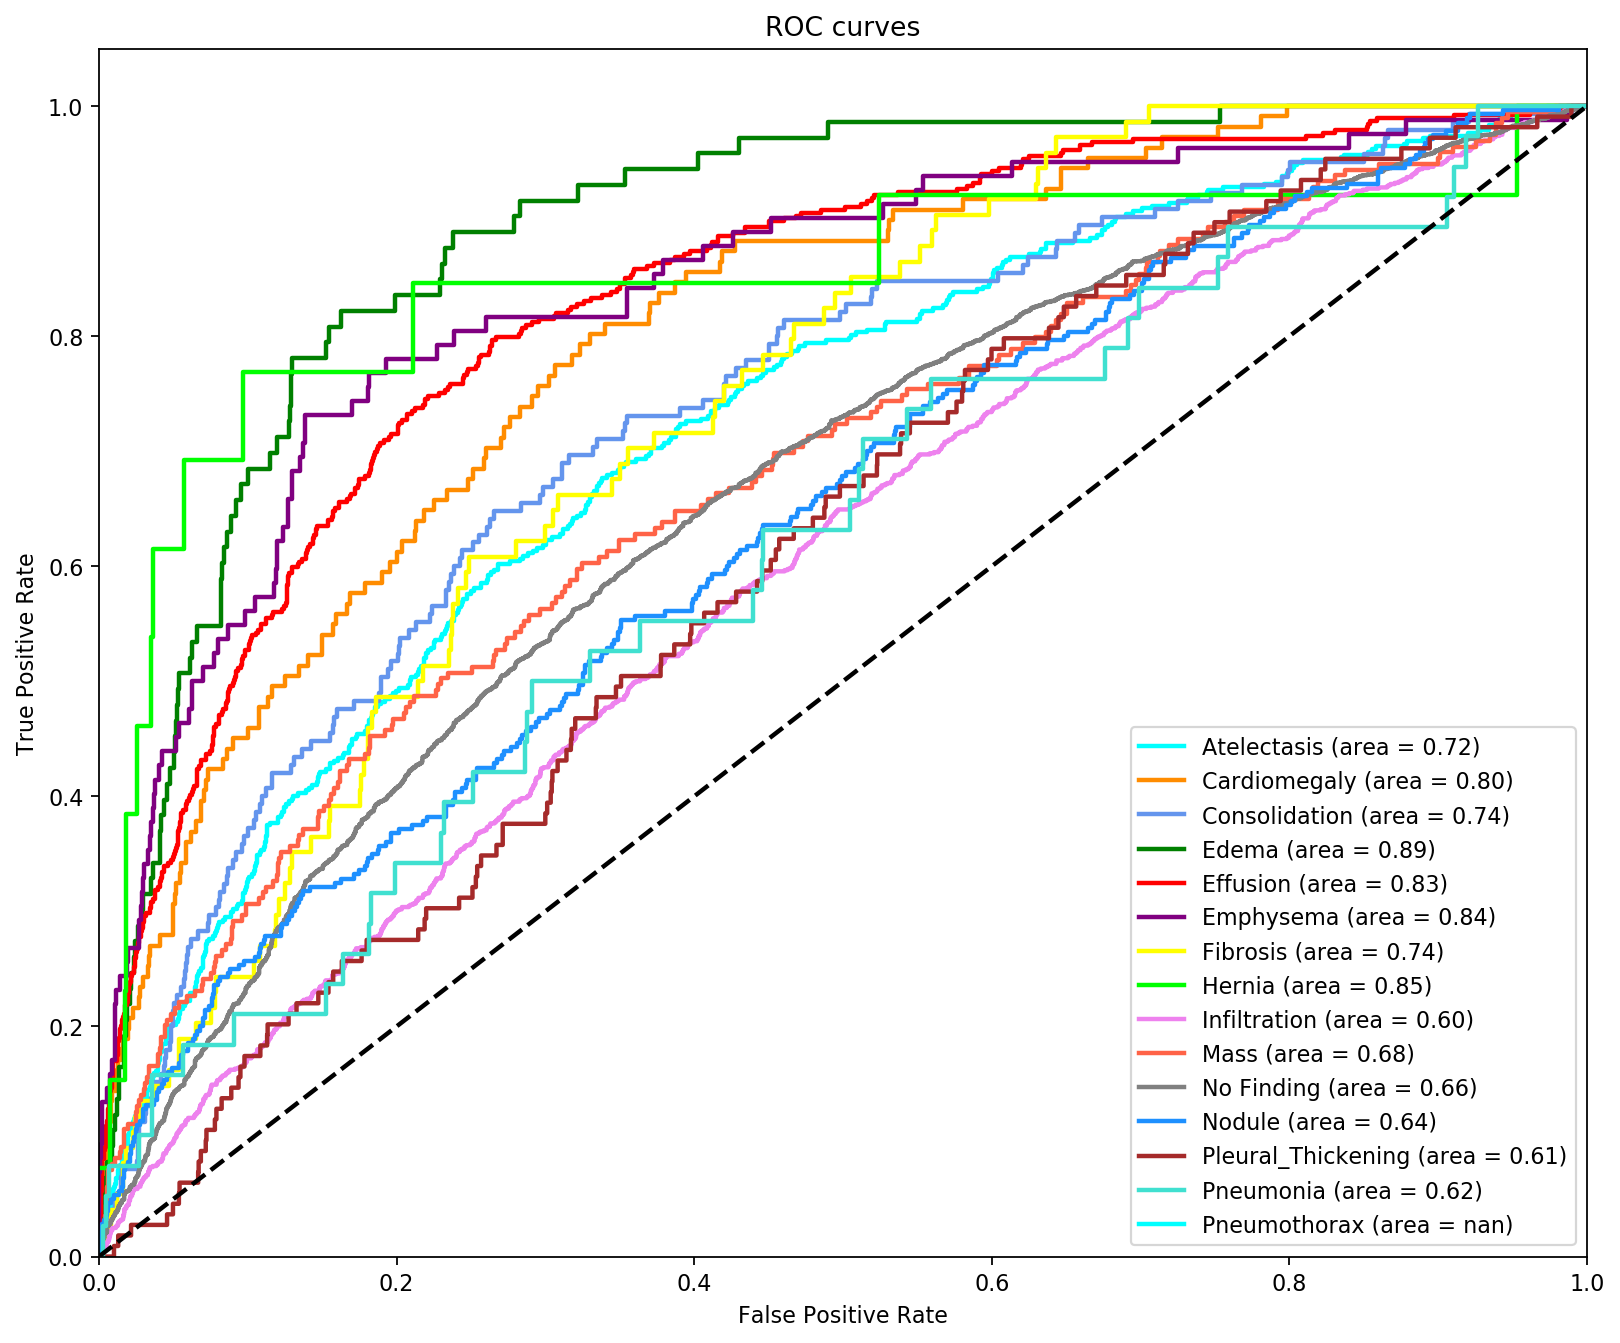

In [44]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    le = LabelEncoder()
    le.classes_ = data_obj['label_encoder_classes']

    n_classes = 15

    # Plot linewidth.
    lw = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(12, 10), dpi=160, facecolor='w', edgecolor='k')

    colors = ['aqua',
              'darkorange',
              'cornflowerblue',
              'green',
              'red',
              'purple',
              'yellow',
              'lime',
              'violet',
              'tomato',
              'gray',
              'dodgerblue',
              'brown',
              'turquoise']
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='{0} (area = {1:0.2f})'
                 ''.format(le.inverse_transform(i), roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()